In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [62]:
#Read the data set
df = pd.read_excel("tele_data.xlsx")
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges numAdminTickets  numTechTickets Churn  
0          29.85        29.85               0               0    No  
1          56.95       1889.5               0               0    No  
2          53.85       108.15               0               0   Yes  
3          42.30      1840.75               0               3    No  
4          70.70       151.65               0               0   Yes  

[5 rows x 23 columns]

In [63]:
#Understand data structure
#Count row and columns
df.shape

(7043, 23)

In [64]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

# 2. Convert column to numeric (invalid entries -> NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3. Fill NaN (the spaces we just replaced) with the column mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
#Convert data type
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
#Column types and count nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
#statistic for numerical columns
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges  \
count    7043.000000  7043.000000     7043.000000   7043.000000   
mean        0.162147    32.371149       64.761692   2283.300441   
std         0.368612    24.559481       30.090047   2265.000258   
min         0.000000     0.000000       18.250000     18.800000   
25%         0.000000     9.000000       35.500000    402.225000   
50%         0.000000    29.000000       70.350000   1400.550000   
75%         0.000000    55.000000       89.850000   3786.600000   
max         1.000000    72.000000      118.750000   8684.800000   

       numAdminTickets  numTechTickets  
count      7043.000000     7043.000000  
mean          0.515689        0.419566  
std           1.275299        1.250117  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.000000        0.000000  
75%           0.000000        0.000000  
max           5.000000        9.000000

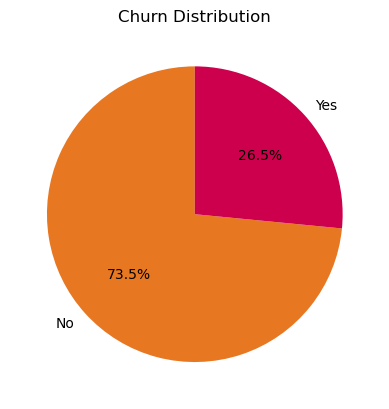

In [66]:
#Churn structure
churn_counts = df['Churn'].value_counts()

# Define PwC colour palette (Yes = Orange, No = Grey)
colors = ["#E87722", "#CC004C", "#A32020", "#D04A02", "#2D2D2D"]

# Plot pie chart
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors)
plt.title("Churn Distribution")
plt.savefig("churn_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


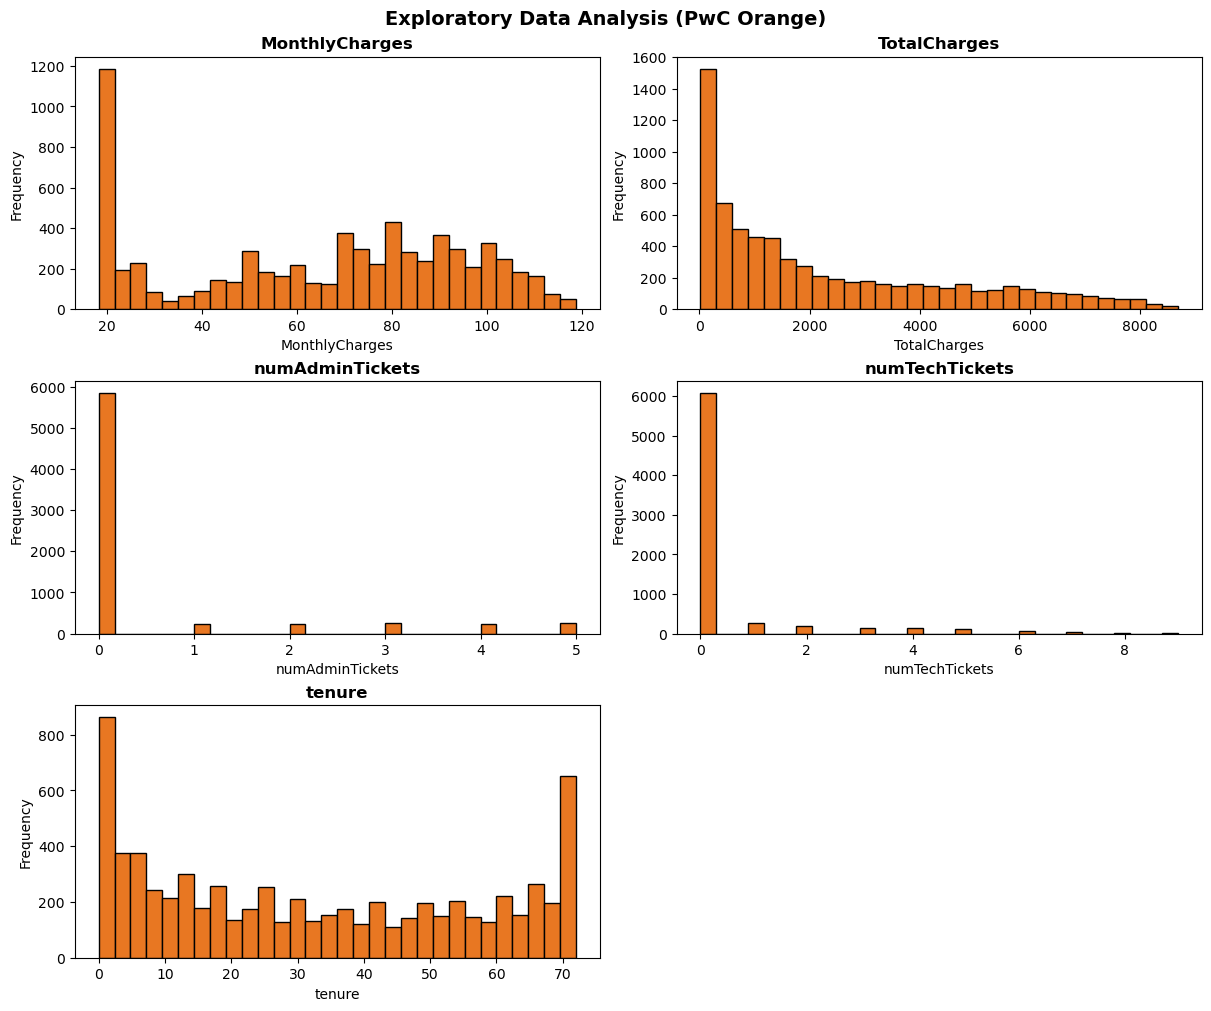

In [67]:
#Exploratory data analysis
# PwC orange
colors = "#E87722"

# cols to plot
cols = ["MonthlyCharges", "TotalCharges", "numAdminTickets", "numTechTickets", "tenure"]

# --- make sure each series is numeric and drop NaNs ---
clean = {}
for c in cols:
    s = pd.to_numeric(df[c], errors="coerce").dropna()
    clean[c] = s

# --- build a 3x2 grid ---
fig, axes = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)
axes = axes.ravel()  # flatten to [0..5]

# plot first 5 histograms in PwC orange
for i, c in enumerate(cols):
    axes[i].hist(clean[c], bins=30, edgecolor="black", color= colors)
    axes[i].set_title(f"{c}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel("Frequency")

# hide the 6th slot
axes[5].axis("off")

plt.suptitle("Exploratory Data Analysis (PwC Orange)", fontsize=14, fontweight="bold")
plt.show()


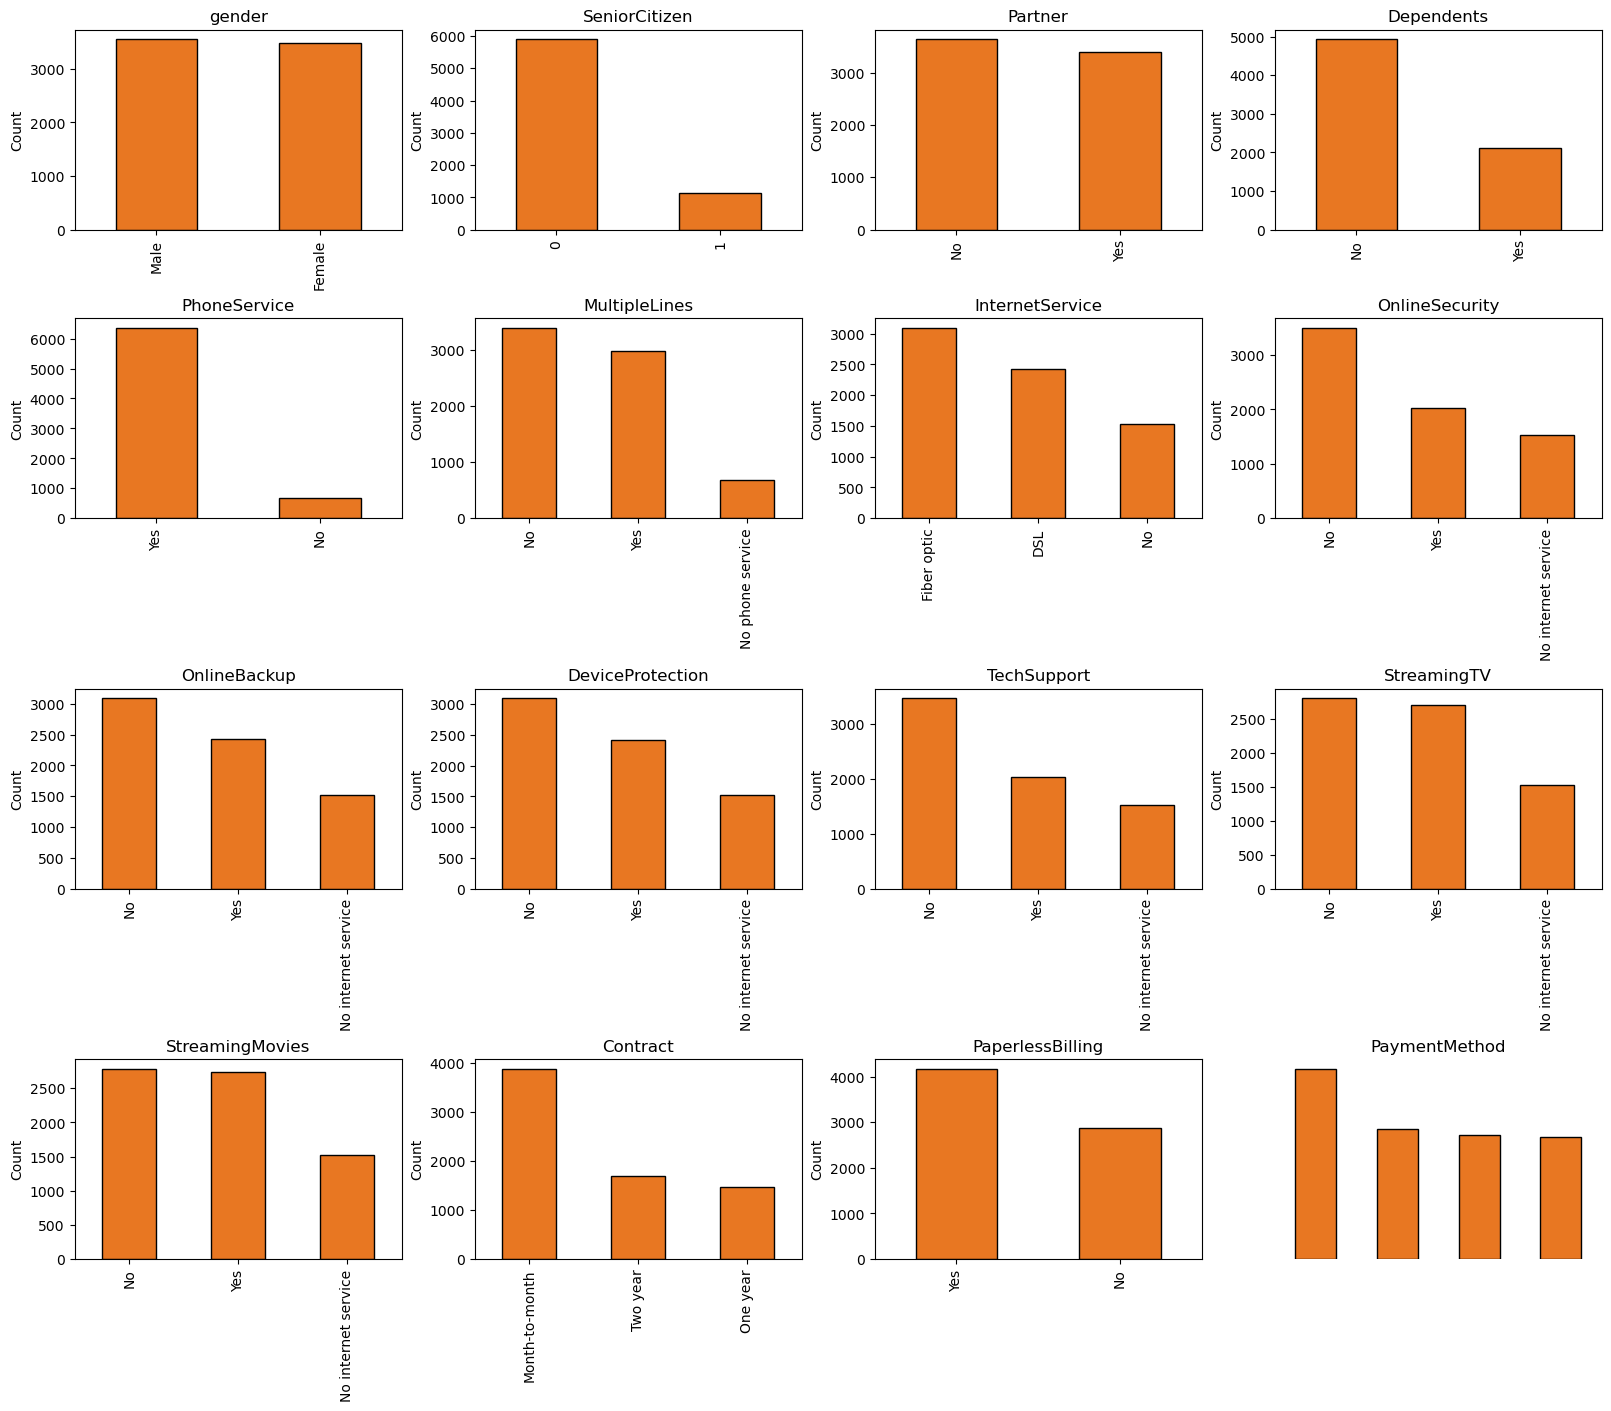

In [68]:
# categorical columns
cat_cols = [
    "gender","SeniorCitizen","Partner","Dependents","PhoneService",
    "MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
    "Contract","PaperlessBilling","PaymentMethod"
]

# build subplot grid: 4x4 = 16 slots (we need 15)
fig, axes = plt.subplots(4, 4, figsize=(16, 14), constrained_layout=True)
axes = axes.ravel()

# plot barplots
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind="bar", ax=axes[i], color=colors, edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# hide the last empty plot (16th)
axes[-1].axis("off")

plt.show()

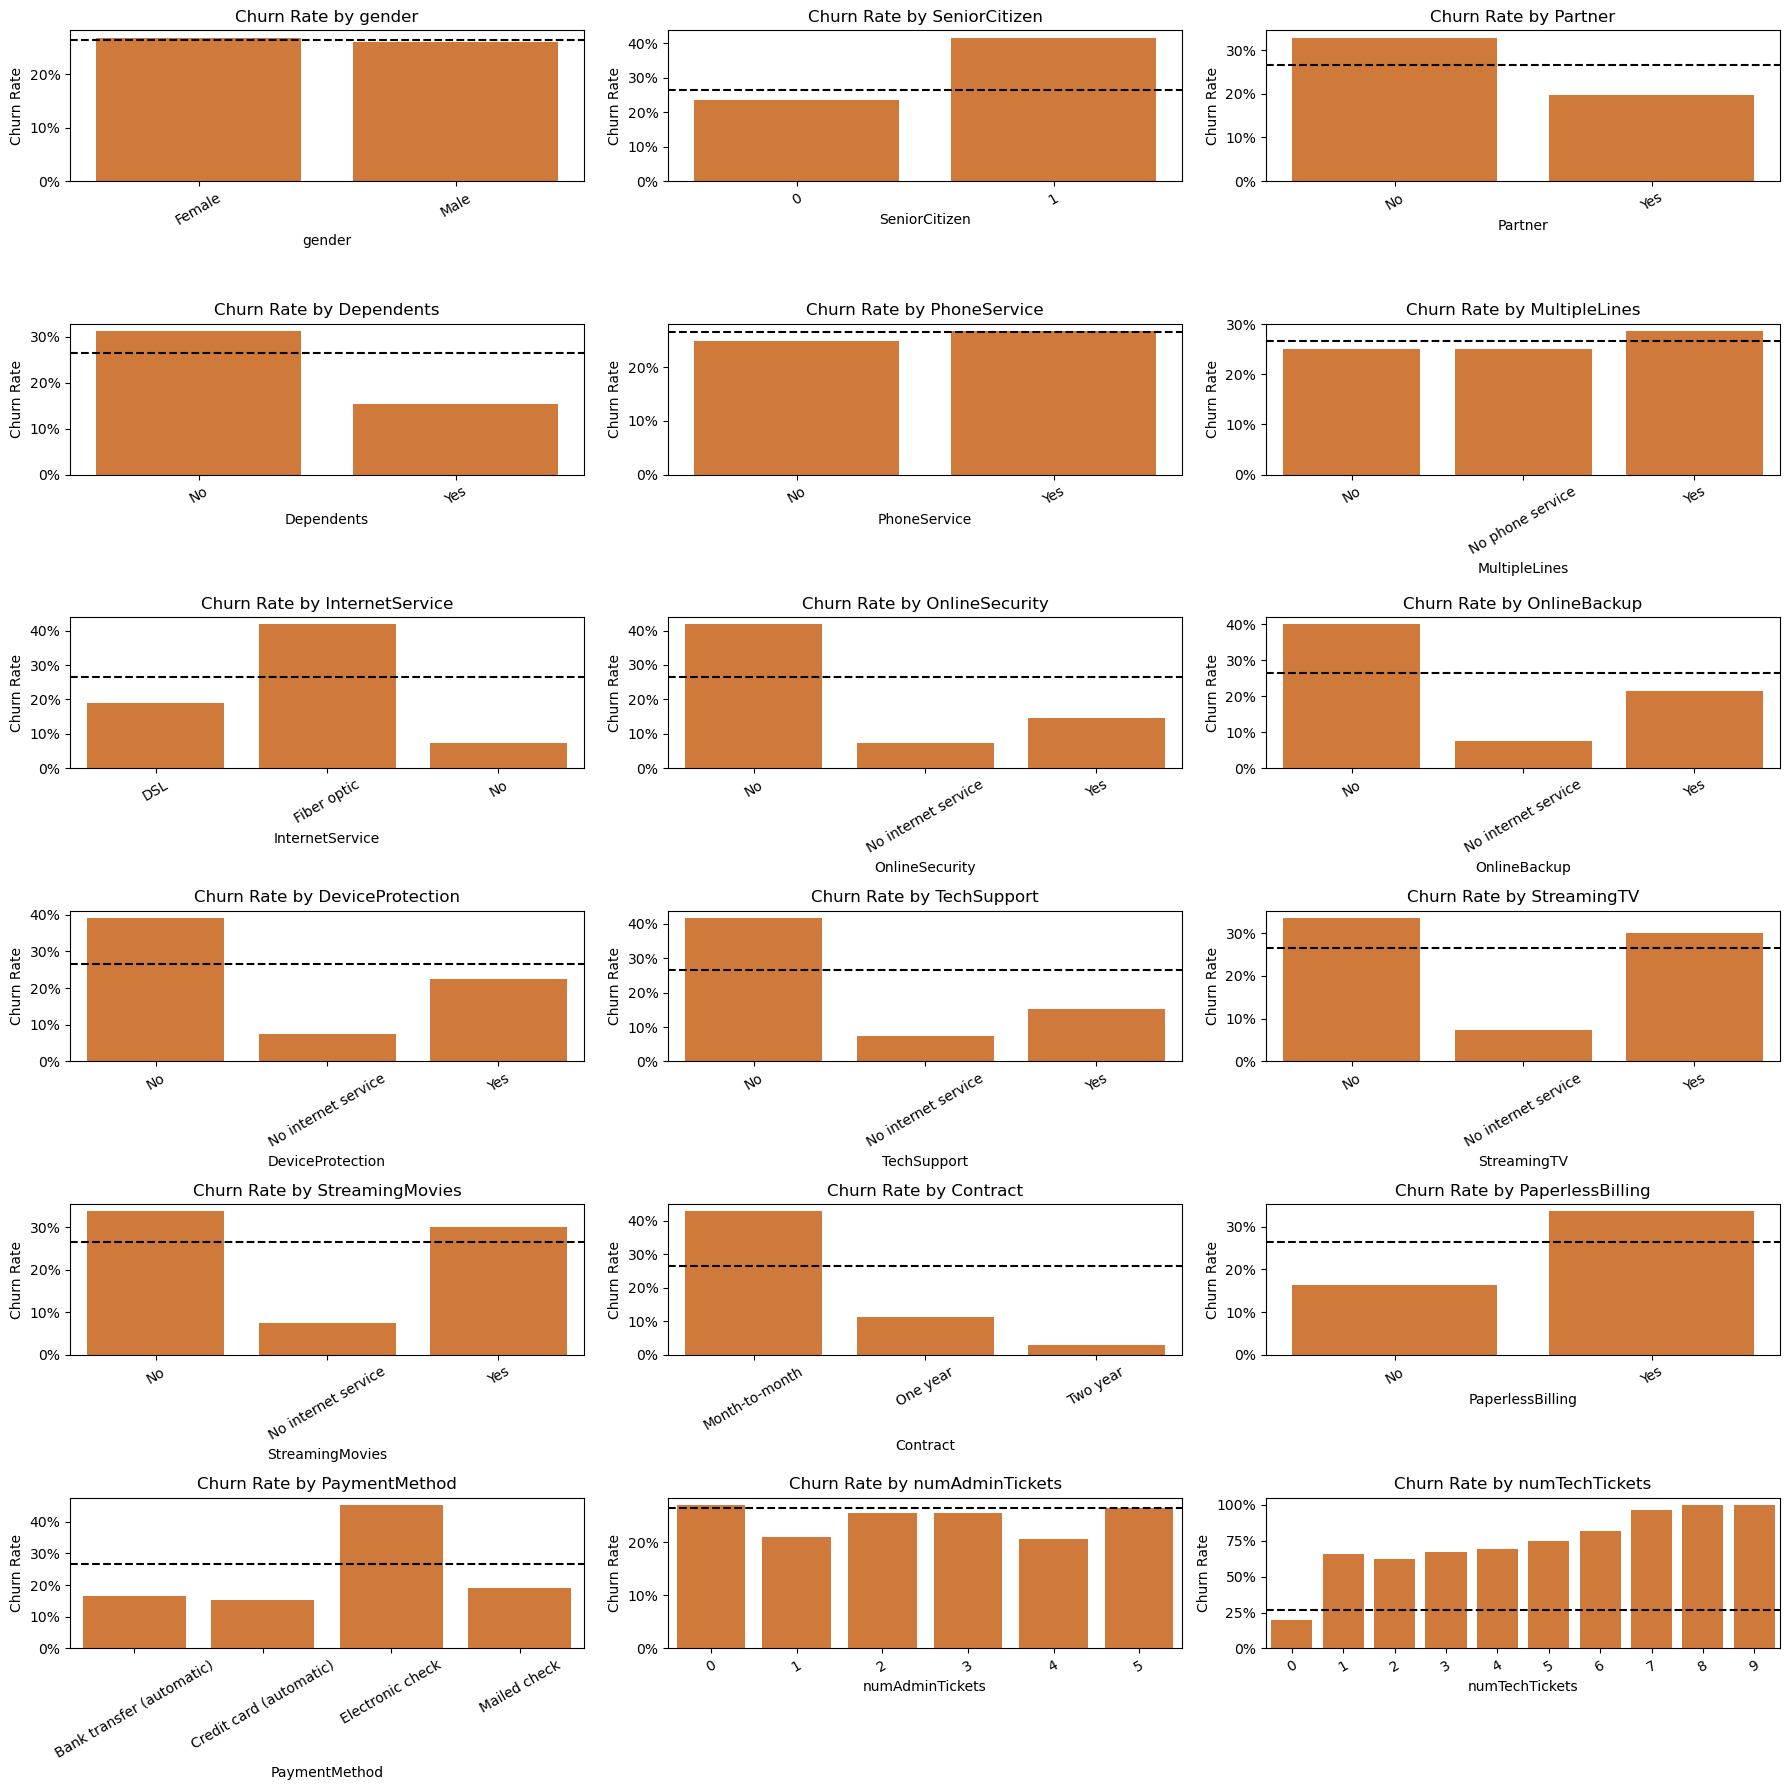

In [69]:
# Extract the columns
cols = df.columns[1:22].drop(df.columns[[5, 18, 19]])

# Calculate overall churn rate
overall_churn_rate = (df["Churn"] == "Yes").mean()

fig, axes = plt.subplots(6, 3, figsize=(18, 18))  # enough grid for 15 plots
axes = axes.flatten()

for i, col in enumerate(cols):
    churn_rate = df.groupby(col)["Churn"].apply(lambda x: (x == "Yes").mean()).reset_index()
    sns.barplot(data=churn_rate, x=col, y="Churn", ax=axes[i],color = colors)
    
    # Title and formatting
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axes[i].set_ylabel("Churn Rate")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].axhline(overall_churn_rate, color="black", linestyle="--")


plt.tight_layout()
plt.show()


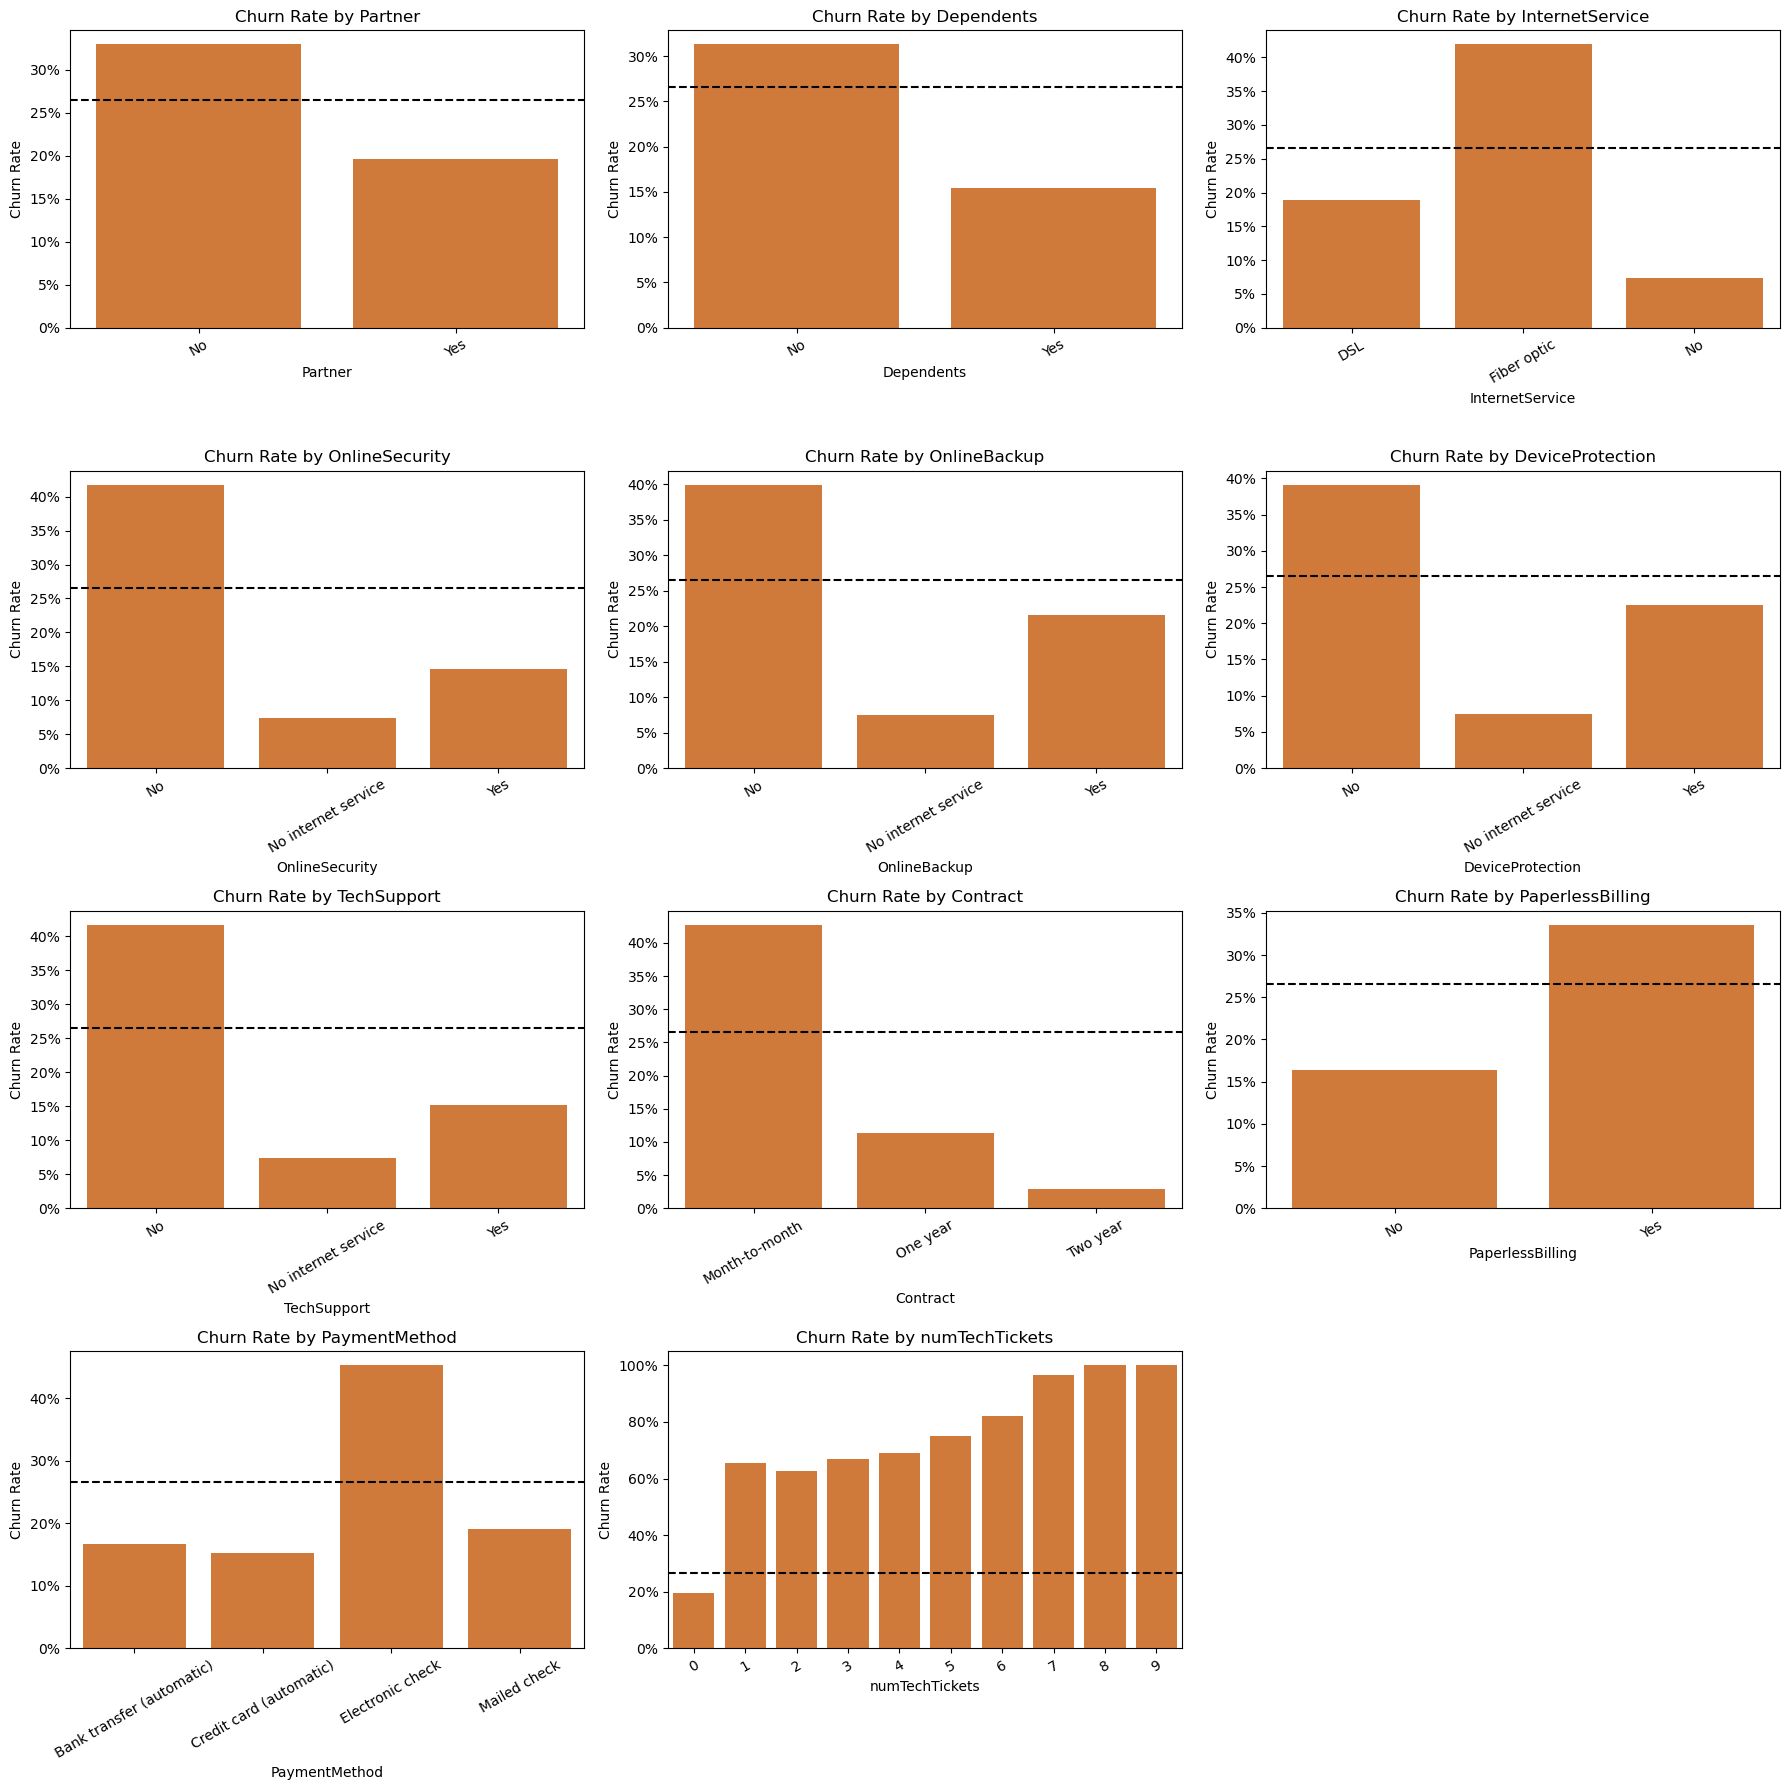

In [70]:
cols = [
    "Partner","Dependents","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","Contract","PaperlessBilling",
    "PaymentMethod","numTechTickets"
]

overall_churn_rate = (df["Churn"] == "Yes").mean()
fig, axes = plt.subplots(4, 3, figsize=(18, 18))  
axes = axes.flatten()

for i, col in enumerate(cols):
    churn_rate = df.groupby(col)["Churn"].apply(lambda x: (x == "Yes").mean()).reset_index()
    sns.barplot(data=churn_rate, x=col, y="Churn", ax=axes[i], color=colors)
    
    # Title and formatting
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axes[i].set_ylabel("Churn Rate")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].axhline(overall_churn_rate, color="black", linestyle="--")

    # Save each subplot individually
    fig_single, ax_single = plt.subplots(figsize=(6, 5))
    sns.barplot(data=churn_rate, x=col, y="Churn", ax=ax_single, color= colors)
    ax_single.set_title(f"Churn Rate by {col}")
    ax_single.yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    ax_single.axhline(overall_churn_rate, color="black", linestyle="--")
    ax_single.tick_params(axis='x', rotation=30)
    
    fig_single.tight_layout()
    fig_single.savefig(f"churn_{col}.png", dpi=300, bbox_inches="tight")
    plt.close(fig_single)  # close to avoid memory issues

# Remove empty axes in grid
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\vista\AppData\Local\Temp\ipykernel_16780\1962769454.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"]


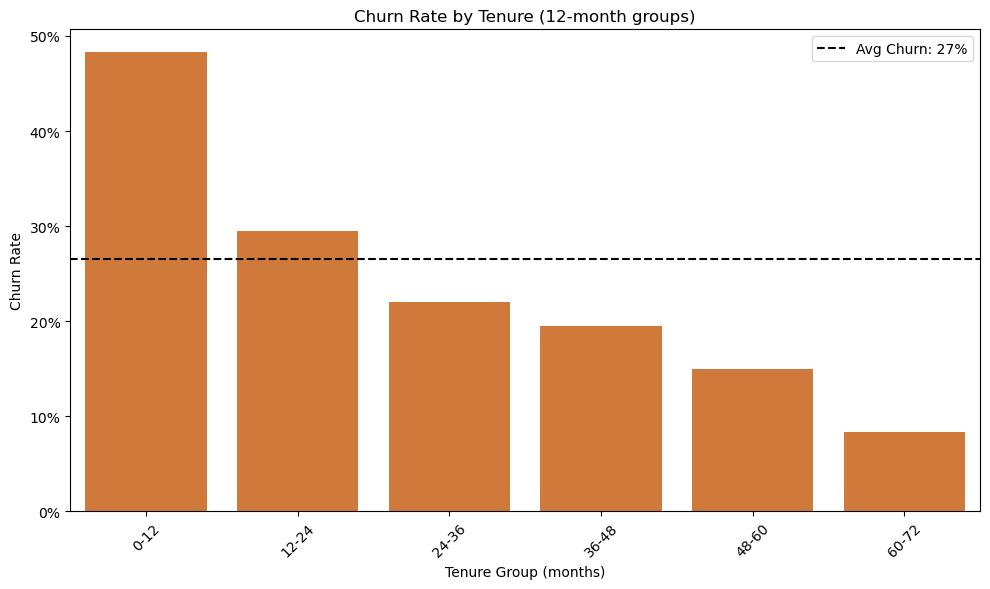

In [71]:
# Define tenure bins (every 12 months, up to the max tenure in the data)
bins = list(range(0, df["tenure"].max() + 12, 12))  # e.g., [0, 12, 24, 36, ...]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=False)
churn_by_tenure = (
    df.groupby("tenure_group")["Churn"]
    .apply(lambda x: (x == "Yes").mean())
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=churn_by_tenure, x="tenure_group", y="Churn", color= colors)

# Formatting
plt.title("Churn Rate by Tenure (12-month groups)")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group (months)")
plt.gca().yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
plt.xticks(rotation=45)

# Add average churn line
overall_churn_rate = (df["Churn"] == "Yes").mean()
plt.axhline(overall_churn_rate, color="black", linestyle="--", label=f"Avg Churn: {overall_churn_rate:.0%}")
plt.legend()
plt.tight_layout()
plt.savefig("Tenure.png",dpi =300)
plt.show()

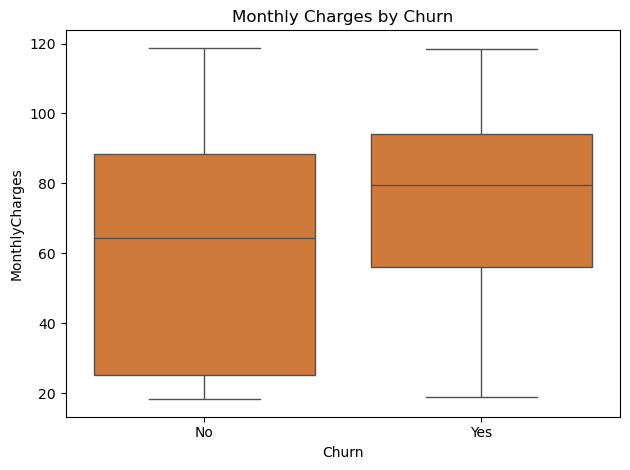

In [72]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges",color = colors)
plt.title("Monthly Charges by Churn")
plt.tight_layout()
plt.savefig("MonthCharges.png",dpi = 300)
plt.show()


In [73]:

df = df.drop(columns = "tenure_group")
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object


In [74]:
from sklearn.preprocessing import StandardScaler

# --- 1) Drop the first column
df_new = df.iloc[:, 1:].copy()

# --- 2) Identify categorical columns
cat_cols = df_new.select_dtypes(include=["object","category"]).columns
print("Categorical columns:", list(cat_cols))

# --- 3) Exclude "Churn" from encoding (but keep it in DataFrame)
encode_cols = cat_cols.drop("Churn") if "Churn" in cat_cols else cat_cols

# --- 4) One-hot encode all other categorical columns
df_encoded = pd.get_dummies(df_new, columns=encode_cols, drop_first=True)

# --- 5) Convert "Churn" to 0/1 (Yes/No or True/False → numeric)
if "Churn" in df_encoded.columns:
    df_encoded["Churn"] = df_encoded["Churn"].replace({"Yes": 1, "No": 0})

# --- 6) Ensure any boolean dummies are 0/1
df_encoded = df_encoded.replace({True: 1, False: 0})

print(df_encoded.head())



Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  numAdminTickets  \
0              0       1           29.85         29.85                0   
1              0      34           56.95       1889.50                0   
2              0       2           53.85        108.15                0   
3              0      45           42.30       1840.75                0   
4              0       2           70.70        151.65                0   

   numTechTickets  Churn  gender_Male  Partner_Yes  Dependents_Yes  ...  \
0               0      0            0            1               0  ...   
1               0      0            1            0               0  ...   
2               0      1            1            0    

C:\Users\vista\AppData\Local\Temp\ipykernel_16780\3184841456.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded["Churn"] = df_encoded["Churn"].replace({"Yes": 1, "No": 0})
C:\Users\vista\AppData\Local\Temp\ipykernel_16780\3184841456.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1544
           1       0.76      0.73      0.74       569

    accuracy                           0.86      2113
   macro avg       0.83      0.82      0.83      2113
weighted avg       0.86      0.86      0.86      2113



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


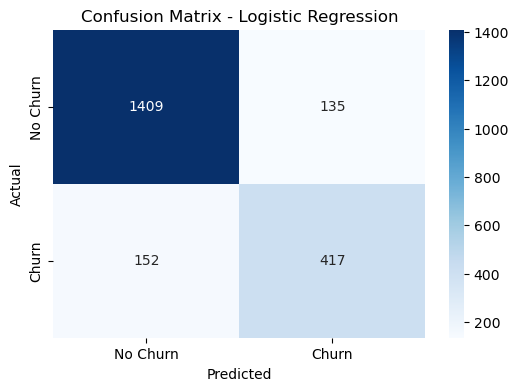

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1544
           1       0.76      0.73      0.74       569

    accuracy                           0.86      2113
   macro avg       0.83      0.82      0.83      2113
weighted avg       0.86      0.86      0.86      2113



In [75]:
from sklearn.metrics import confusion_matrix

# Split features and target
Xl = df_encoded.drop("Churn", axis=1)
yl = df_encoded["Churn"]

# Train-test split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    Xl, yl, test_size=0.3, random_state=36
)

# Logistic regression model
l_model = LogisticRegression(max_iter=1000)
l_model.fit(Xl_train, yl_train)

# Predictions
yl_pred = l_model.predict(Xl_test)

# Classification report
print("Classification Report:")
print(classification_report(yl_test, yl_pred))

# Confusion matrix
cm = confusion_matrix(yl_test, yl_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(yl_test, yl_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.8596348884381338

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1544
           1       0.76      0.72      0.74       569

    accuracy                           0.86      2113
   macro avg       0.83      0.82      0.82      2113
weighted avg       0.86      0.86      0.86      2113



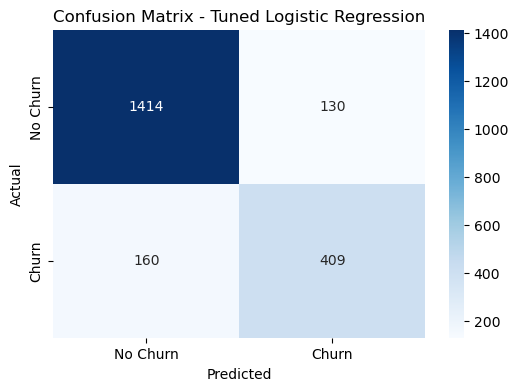

In [76]:
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],          
    "penalty": ["l1", "l2"],               
    "solver": ["liblinear", "saga"]        
}

# Grid search with cross-validation
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(Xl_train, yl_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
yl_pred = best_model.predict(Xl_test)

print("\nClassification Report:")
print(classification_report(yl_test, yl_pred))

# Confusion matrix
cm = confusion_matrix(yl_test, yl_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.savefig("tuned_logistic_regression.png", dpi=300, bbox_inches='tight')  # PNG
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Decision Tree - Confusion Matrix:
[[1422  130]
 [ 191  370]]

Tuned Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1552
           1       0.74      0.66      0.70       561

    accuracy                           0.85      2113
   macro avg       0.81      0.79      0.80      2113
weighted avg       0.84      0.85      0.85      2113



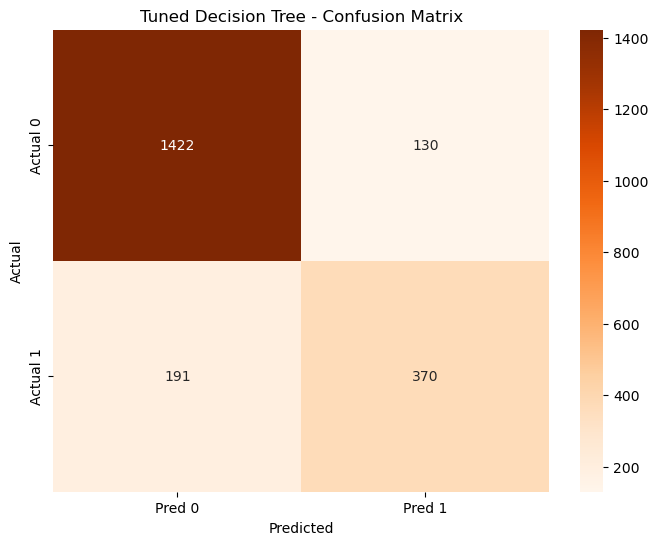

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=36, stratify=y)

# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          # or try 'log_loss' too
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'class_weight': [None, 'balanced'],      # <- add if you suspect imbalance
}

# Base model (set random_state for reproducibility)
dtree = DecisionTreeClassifier(random_state=36)

# Grid search (explicit cv)
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True  # default; keeps the best model retrained on full training set
)

# Fit
grid_search.fit(X_train, y_train)

# Best params and model
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
print("Tuned Decision Tree - Confusion Matrix:")
labels = sorted(y.unique())  # ensure consistent order
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)

print("\nTuned Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred, labels=labels))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Oranges',
    xticklabels=[f'Pred {lbl}' for lbl in labels],
    yticklabels=[f'Actual {lbl}' for lbl in labels]
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Decision Tree - Confusion Matrix')
plt.savefig("tuned_decision_tree.png", dpi=300, bbox_inches='tight')  # PNG

plt.show()

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters (Random Forest): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - Confusion Matrix:
[[1441  111]
 [ 169  392]]

Tuned Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1552
           1       0.78      0.70      0.74       561

    accuracy                           0.87      2113
   macro avg       0.84      0.81      0.82      2113
weighted avg       0.86      0.87      0.87      2113



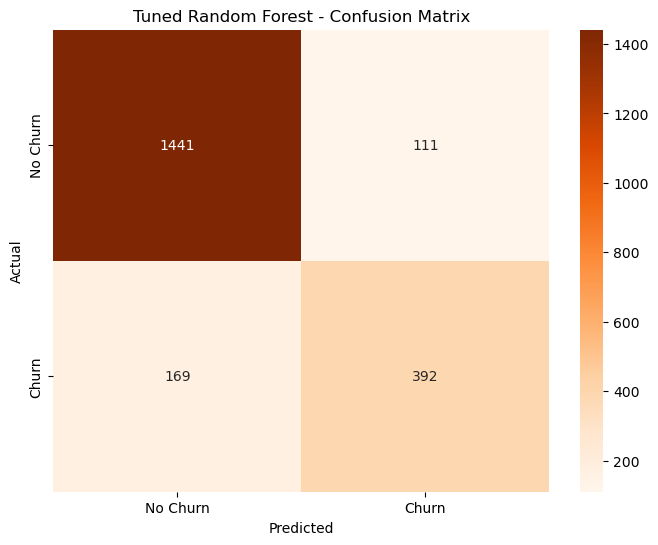

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],       # number of trees
    'criterion': ['gini', 'entropy'],      # split criteria
    'max_depth': [None, 10, 20, 30],       # tree depth
    'min_samples_split': [2, 5, 10],       # min samples to split
    'min_samples_leaf': [1, 2, 4],         # min samples in leaf
    'max_features': ['sqrt', 'log2']       # features per split
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters (Random Forest): {best_params_rf}")

# Train Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
print("Tuned Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("\nTuned Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Compute the confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot and export the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap="Oranges",
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest - Confusion Matrix')

# ✅ Export the chart
plt.savefig("tuned_random_forest_confusion_matrix.png", dpi=300, bbox_inches='tight')  # PNG

plt.show()


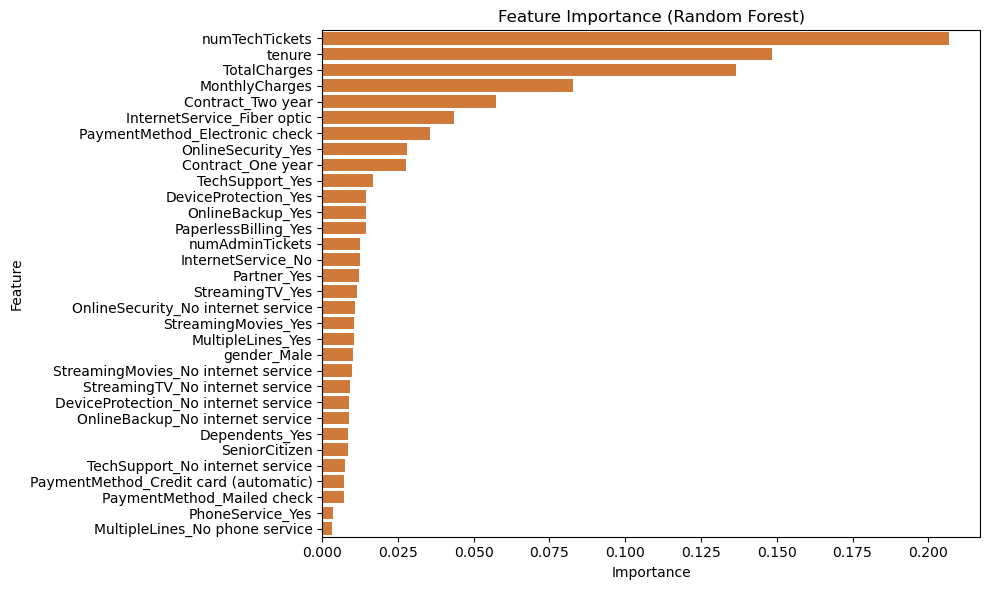

In [79]:
# Get feature importances
importances = rf_best.feature_importances_

# Put into a DataFrame for readability
feat_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, color="#E87722") 
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()

# ✅ Save the picture
plt.savefig("random_forest_feature_importance.png", dpi=300, bbox_inches='tight')  # PNG

plt.show()